1. 首先，我们拿到的数据是持卡人两天内的信用卡交易数据，这份数据包含很多维度，要解决的问题是预测持卡人是否会发生信用卡被盗刷。信用卡持卡人是否会发生被盗刷只有两种可能，发生被盗刷或不发生被盗刷。又因为这份数据是打标好的（字段Class是目标列），也就是说它是一个监督学习的场景。于是，我们判定信用卡持卡人是否会发生被盗刷是一个**二元分类**问题，意味着可以通过二分类相关的算法来找到具体的解决办法，本项目选用的算法是逻辑斯蒂回归（Logistic Regression）。
2. 分析数据：数据是结构化数据 ，不需要做特征抽象。特征V1至V28是经过PCA处理，而特征Time和Amount的数据规格与其他特征差别较大，需要对其做特征缩放，将特征缩放至同一个规格。在数据质量方面 ，没有出现乱码或空字符的数据，可以确定字段Class为目标列，其他列为特征列。
3. 这份数据是全部打标好的数据，可以通过交叉验证的方法对训练集生成的模型进行评估。70%的数据进行训练，30%的数据进行预测和评估。
&emsp&emsp**现对该业务场景进行总结如下：**
1. 根据历史记录数据学习并对信用卡持卡人是否会发生被盗刷进行预测，二分类监督学习场景，选择逻辑斯蒂回归（Logistic Regression）算法。
1. 数据为结构化数据，不需要做特征抽象，但需要做特征缩放。

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
#将matplotlib绘制的图表直接嵌入到当前文档页面中
%matplotlib inline 

In [5]:
credict = pd.read_csv('creditcard.csv')

In [6]:
credict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credict.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credict.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
credict.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
c_counts = credict['Class'].value_counts()

<Axes: xlabel='Class'>

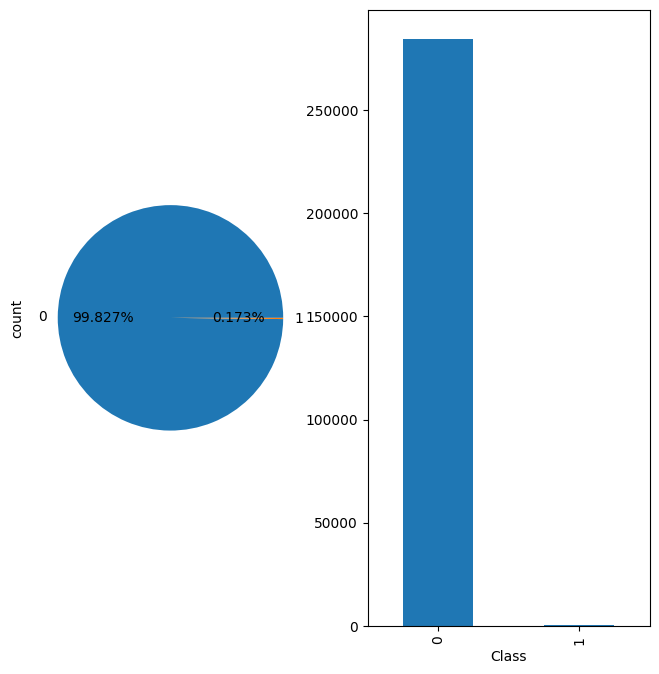

In [11]:
plt.figure(figsize=(8,8))
ax=plt.subplot(1,2,1)
c_counts.plot(kind='pie',autopct='%.3f%%',ax=ax)
ax=plt.subplot(1,2,2)
c_counts.plot(kind='bar',ax=ax)

In [12]:
credict['Time'] = credict['Time'].map(lambda x : divmod(x,3600)[0])

In [13]:
credict['Time']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    47.0
284803    47.0
284804    47.0
284805    47.0
284806    47.0
Name: Time, Length: 284807, dtype: float64

In [14]:
len(credict.columns)

31

<Axes: ylabel='Frequency'>

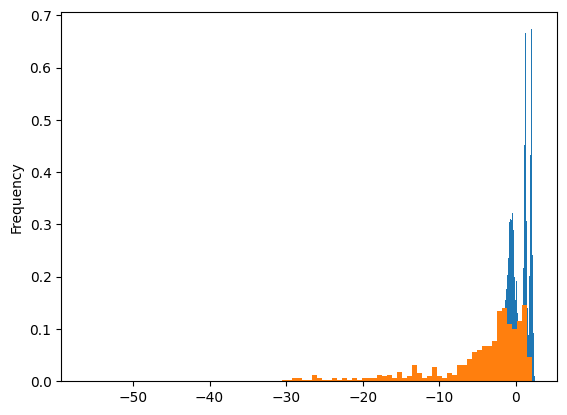

In [15]:
cond0 = credict['Class']==0
cond1=credict['Class']==1
credict.loc[cond0,'V1'].plot(kind='hist',bins=500,density=True)
credict.loc[cond1,'V1'].plot(kind='hist',bins=50,density=True)

In [16]:
credict.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

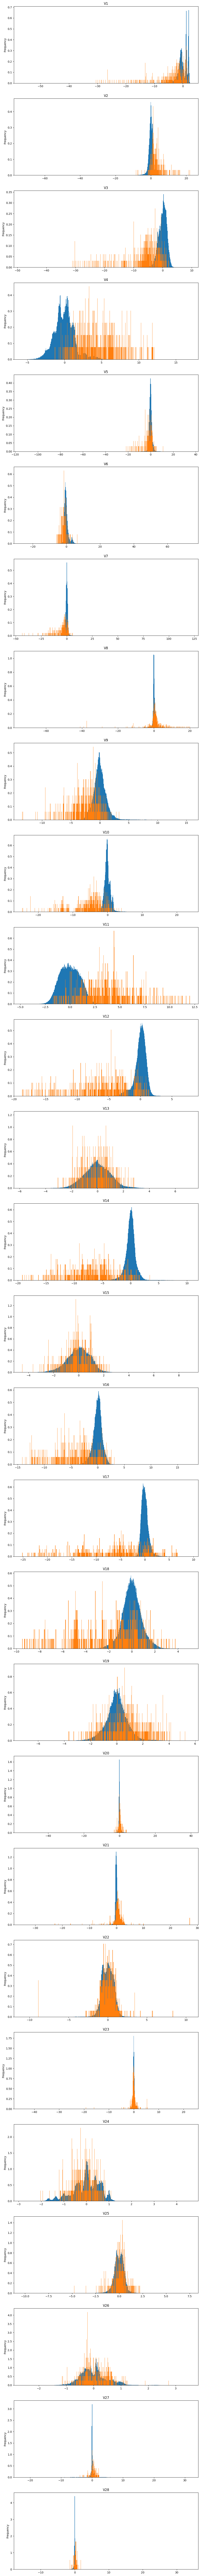

In [19]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
cond0 = credict['Class']==0
cond1=credict['Class']==1
plt.figure(figsize=(12,28*6))
for i ,col in enumerate(cols):
    ax = plt.subplot(28,1,i+1)
    credict.loc[cond0,col].plot(kind='hist',bins=500,density=True,ax=ax)
    credict.loc[cond1,col].plot(kind='hist',bins=500,density=True,ax=ax)
    ax.set_title(col)

In [20]:
drops = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
credict2=credict.drop(columns=drops)

In [21]:
credict2.shape

(284807, 19)

In [22]:
credict.shape

(284807, 31)

Amount变量和Time变量的取值范围与其他变量相差较大，所以要对其进行特征缩放  
sklearn.preprocessing.StandarScaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
credict2.Amount.max()

np.float64(25691.16)

In [27]:
credict2.Amount.min()

np.float64(0.0)

In [28]:
scaler = StandardScaler()
credict2['Amount']=scaler.fit_transform(credict2[['Amount']])

In [29]:
credict2.Amount.max()

np.float64(102.36224270928423)

In [34]:
credict2.Amount.min()

np.float64(-0.35322939296682354)

In [35]:
scaler = StandardScaler()
credict2['Time']=scaler.fit_transform(credict2[['Time']])

In [36]:
credict2.Time.max()

np.float64(1.6044448928637371)

In [37]:
credict2.Time.min()

np.float64(-1.9602638886856407)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbdt = GradientBoostingClassifier()
X_train = credit2.iloc[:, :-1]
y_train = credit2.Class.values
gbdt.fit(X_train, y_train)

In [ ]:
feature_importances = gbdt.feature_importances_

In [ ]:
index = feature_importance.agesort()[::-1]

In [ ]:
cols = X_train.columns

In [ ]:
feature_importances

In [ ]:
plt.figure(figsize=(12,9))
plt.bar(np.arange(len(index)),feature_importances[index])
_=plt.xticks(np.arange(len(index)),cols[index])

In [45]:
drops = ['V7', 'V5', 'V4', 'V19', 'V11', 'V1', 'Amount']
credit3 = credict2.drop(columns=drops)
credit3.shape

(284807, 12)

In [42]:
!pip install imbalanced-learn -i https://pypi.tuna.tsinghua.edu.cn/simple/

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from imblearn.over_sampling import  SMOTE

In [48]:
data = credit3.iloc[:,:-1]
target = credit3.Class.values

In [49]:
data.shape

(284807, 11)

In [50]:
smote=SMOTE()
data_resampled,target_resampled = smote.fit_resample(data,target)

In [51]:
data_resampled.shape

(568630, 11)

In [52]:
(target_resampled==1).sum()

np.int64(284315)

In [54]:
(target_resampled==0).sum()

np.int64(284315)

In [55]:
import itertools

In [57]:
def plot_confusion_matrix(cm,classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes)) #基于类别数量设置坐标轴刻度
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)

    threshold=cm.max()/2
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(data_resampled,target_resampled)

In [61]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_ = logistic.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(y_test, y_)

In [65]:
cm

array([[69679,  1377],
       [ 8369, 62733]])

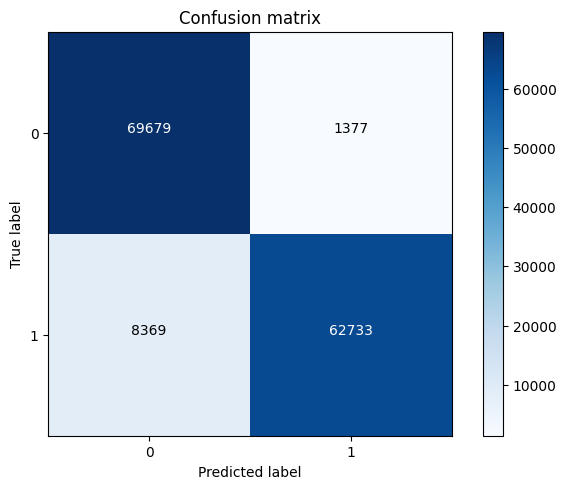

In [66]:
plot_confusion_matrix(cm, [0, 1])

In [67]:
# 这个项目中, 关心什么指标, 准确率?
# 召回率
cm[1, 1] / (cm[1, 0] + cm[1, 1])

np.float64(0.8822958566566341)

In [68]:
from sklearn.metrics import recall_score

In [69]:
# 作为一个baseline
recall_score(y_test, y_)

0.8822958566566341

In [70]:
(cm[0, 0] + cm[1, 1]) / cm.sum()

np.float64(0.9314424794946468)

In [71]:
from sklearn.model_selection import GridSearchCV

In [76]:
logistic = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'tol': [1e-3, 1e-4, 1e-5]  #收敛容忍度
}
gv = GridSearchCV(logistic, param_grid=param_grid, n_jobs=-1)

In [77]:
gv.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'tol': [0.001, 0.0001, 1e-05]})

In [78]:
gv.best_score_

np.float64(0.9315851899627665)

In [79]:
gv.best_params_

{'C': 1, 'tol': 0.001}

In [80]:
# 召回率
y_ = gv.predict(X_test)

In [81]:
recall_score(y_test, y_)

0.8826896571123175